In [1]:
import os
print(os.getcwd())

/workspaces/EspecMiguel/Trabajo Final


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import io
import seaborn as sns

In [3]:
df = pd.read_csv('../datos/Estudiantes.csv', sep = ';')
df.head()

,PERIODO,ESTU_CONSECUTIVO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_DEPTO_UBICACION,COLE_GENERO,COLE_JORNADA,COLE_NATURALEZA,ESTU_COD_DEPTO_PRESENTACION,...,FAMI_ESTRATOVIVIENDA,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL
0,20181,SB11201810028234,URBANO,N,B,VALLE,MIXTO,MAÑANA,NO OFICIAL,76,...,Estrato 5,No,Si,Si,52.0,34,32,41,44,194
1,20181,SB11201810047396,URBANO,N,A,TOLIMA,MIXTO,SABATINA,NO OFICIAL,73,...,Estrato 6,Si,Si,Si,47.0,47,46,52,58,252
2,20181,SB11201810016997,URBANO,S,B,BOGOTA,MIXTO,COMPLETA,NO OFICIAL,11,...,Estrato 6,Si,Si,Si,87.0,79,74,77,71,381
3,20181,SB11201810000913,URBANO,N,B,NARIÑO,MIXTO,COMPLETA,NO OFICIAL,52,...,Estrato 4,Si,Si,Si,81.0,81,66,75,73,372
4,20181,SB11201810011839,URBANO,N,OTRO,CUNDINAMARCA,MIXTO,NOCHE,NO OFICIAL,25,...,Estrato 1,No,No,No,45.0,36,32,39,46,194


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110328 entries, 0 to 110327
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   PERIODO                      110328 non-null  int64  
 1   ESTU_CONSECUTIVO             110328 non-null  object 
 2   COLE_AREA_UBICACION          110328 non-null  object 
 3   COLE_BILINGUE                92637 non-null   object 
 4   COLE_CALENDARIO              110328 non-null  object 
 5   COLE_DEPTO_UBICACION         110328 non-null  object 
 6   COLE_GENERO                  110328 non-null  object 
 7   COLE_JORNADA                 110328 non-null  object 
 8   COLE_NATURALEZA              110328 non-null  object 
 9   ESTU_COD_DEPTO_PRESENTACION  110328 non-null  int64  
 10  ESTU_DEPTO_PRESENTACION      110328 non-null  object 
 11  ESTU_GENERO                  110309 non-null  object 
 12  FAMI_EDUCACIONMADRE          103668 non-null  object 
 13 

In [5]:
df.describe(include='all')

,PERIODO,ESTU_CONSECUTIVO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_DEPTO_UBICACION,COLE_GENERO,COLE_JORNADA,COLE_NATURALEZA,ESTU_COD_DEPTO_PRESENTACION,...,FAMI_ESTRATOVIVIENDA,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL
count,110328.000000,110328,110328,92637,110328,110328,110328,110328,110328,110328.000000,...,102861,106305,106503,103569,110294.000000,110328.000000,110328.000000,110328.000000,110328.000000,110328.000000
unique,NaN,110328,2,2,3,34,3,6,2,NaN,...,7,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,SB11201810028234,URBANO,N,A,BOGOTÁ,MIXTO,MAÑANA,OFICIAL,NaN,...,Estrato 2,No,Si,Si,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,92931,89270,100326,16049,105948,49817,75855,NaN,...,35445,75987,62761,66691,NaN,NaN,NaN,NaN,NaN,NaN
mean,20195.361431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.833777,...,NaN,NaN,NaN,NaN,50.166083,51.476706,47.334629,49.197266,52.998504,251.225065
std,6.959824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.216766,...,NaN,NaN,NaN,NaN,14.139080,12.522051,12.715331,11.283512,10.924502,54.533057
min,20181.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20194.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,...,NaN,NaN,NaN,NaN,40.000000,43.000000,37.000000,41.000000,45.000000,210.000000
50%,20194.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,...,NaN,NaN,NaN,NaN,49.000000,51.000000,46.000000,49.000000,53.000000,247.000000
75%,20194.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.000000,...,NaN,NaN,NaN,NaN,58.000000,60.000000,57.000000,57.000000,61.000000,289.000000


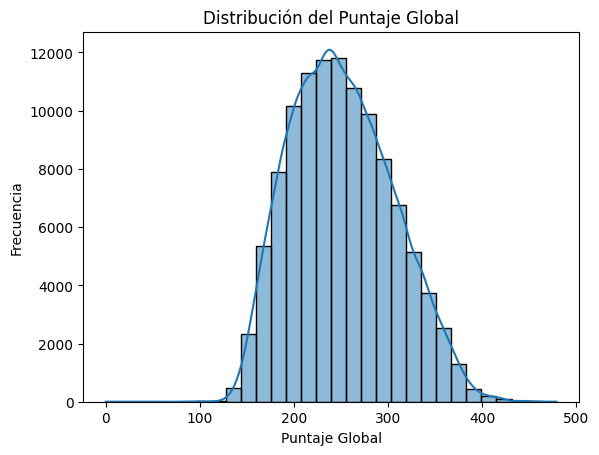

In [6]:
sns.histplot(df['PUNT_GLOBAL'], kde=True, bins=30)
plt.title('Distribución del Puntaje Global')
plt.xlabel('Puntaje Global')
plt.ylabel('Frecuencia')
plt.show()

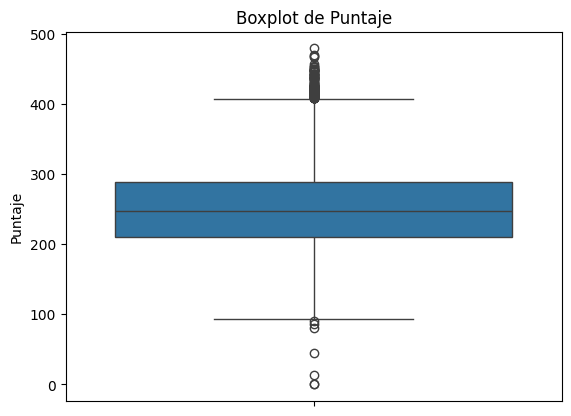

In [7]:
sns.boxplot(y=df['PUNT_GLOBAL'])
plt.title('Boxplot de Puntaje')
plt.ylabel('Puntaje')
plt.show()

<Axes: xlabel='COLE_CALENDARIO', ylabel='PUNT_GLOBAL'>

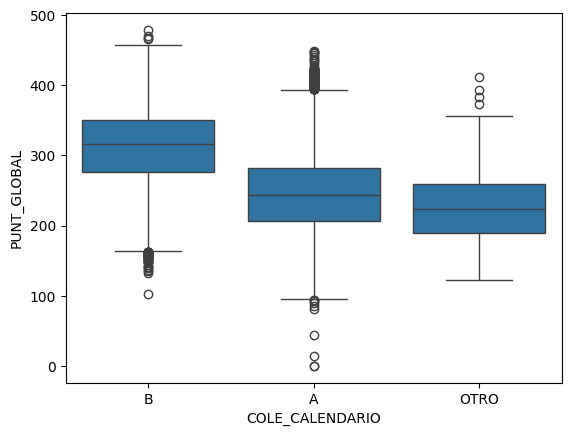

In [8]:
sns.boxplot(x='COLE_CALENDARIO', y='PUNT_GLOBAL', data=df)

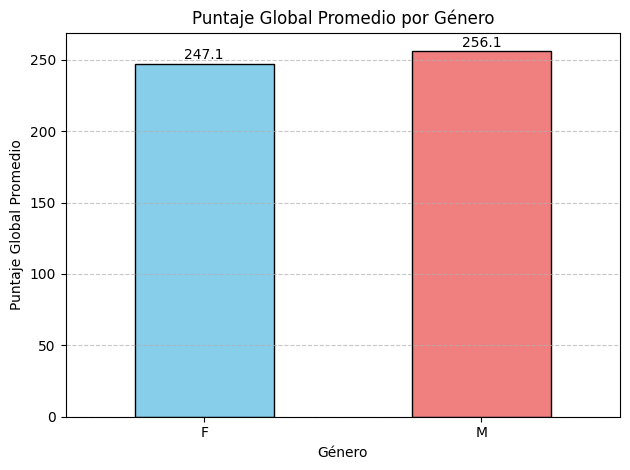

In [9]:
df_genero_puntaje = df[['ESTU_GENERO', 'PUNT_GLOBAL']]

puntaje_promedio_por_genero = df_genero_puntaje.groupby('ESTU_GENERO')['PUNT_GLOBAL'].mean().sort_values()

colores = ['skyblue', 'lightcoral', 'mediumseagreen', 'plum', 'gold']

ax = puntaje_promedio_por_genero.plot(
    kind='bar',
    color=colores[:len(puntaje_promedio_por_genero)],
    edgecolor='black'
)

plt.title('Puntaje Global Promedio por Género')
plt.ylabel('Puntaje Global Promedio')
plt.xlabel('Género')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar etiquetas de valor sobre las barras
for i, value in enumerate(puntaje_promedio_por_genero.values):
    plt.text(i, value + 1, f'{value:.1f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

<Axes: xlabel='FAMI_ESTRATOVIVIENDA', ylabel='PUNT_GLOBAL'>

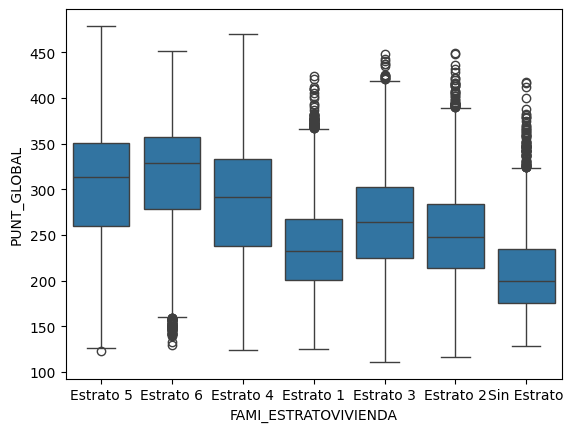

In [10]:
sns.boxplot(x='FAMI_ESTRATOVIVIENDA', y='PUNT_GLOBAL', data=df)

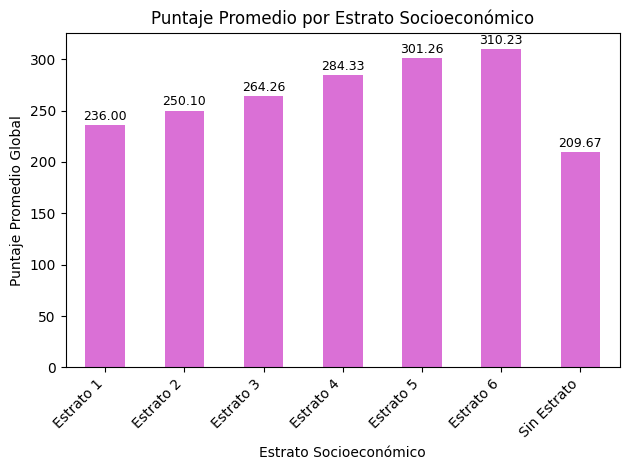

In [11]:
df.groupby('FAMI_ESTRATOVIVIENDA')['PUNT_GLOBAL'].mean().sort_index().plot(kind='bar', color='orchid')
plt.title('Puntaje Promedio por Estrato Socioeconómico')
promedios_por_estrato = df.groupby('FAMI_ESTRATOVIVIENDA')['PUNT_GLOBAL'].mean().sort_index()
for i, value in enumerate(promedios_por_estrato.values):
    plt.text(i, value +2, f'{value:.2f}', ha='center', va='bottom', fontsize=9)
plt.xlabel('Estrato Socioeconómico')
plt.ylabel('Puntaje Promedio Global')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

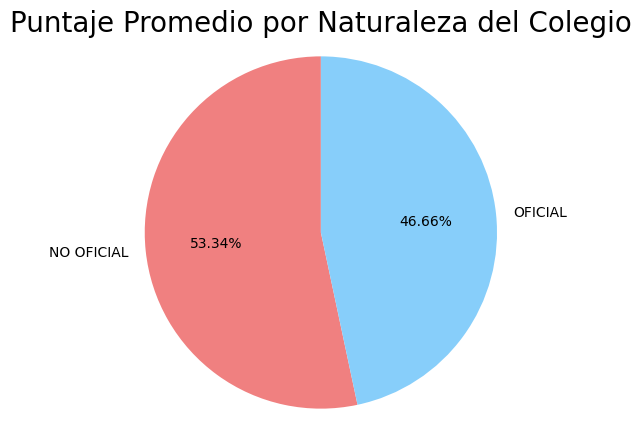

In [12]:
puntaje_promedio_por_naturaleza = df.groupby('COLE_NATURALEZA')['PUNT_GLOBAL'].mean()

plt.figure(figsize=(5, 5))
plt.pie(puntaje_promedio_por_naturaleza,
        labels=puntaje_promedio_por_naturaleza.index,
        autopct='%1.2f%%',
        startangle=90,
        colors=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Puntaje Promedio por Naturaleza del Colegio', fontsize=20)
plt.axis('equal')
plt.show()

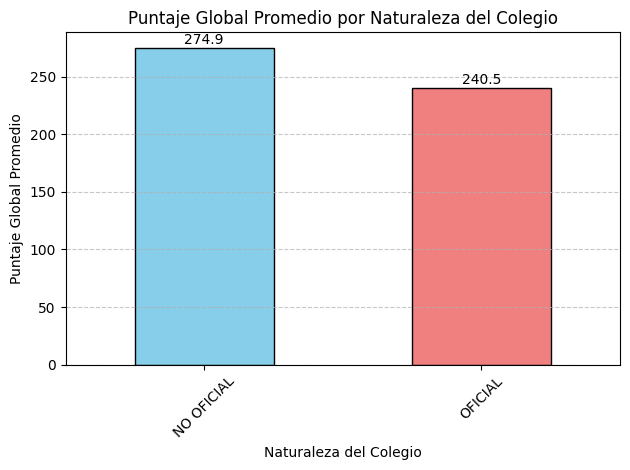

In [13]:
puntaje_por_naturaleza = df.groupby('COLE_NATURALEZA')['PUNT_GLOBAL'].mean().sort_values(ascending=False)

colors = plt.cm.viridis(range(len(puntaje_por_naturaleza)))

puntaje_por_naturaleza.plot(kind='bar', color=colores, edgecolor='black')

for i, valor in enumerate(puntaje_por_naturaleza):
    plt.text(i, valor + 1, f'{valor:.1f}', ha='center', va='bottom')

plt.title('Puntaje Global Promedio por Naturaleza del Colegio')
plt.xlabel('Naturaleza del Colegio')
plt.ylabel('Puntaje Global Promedio')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

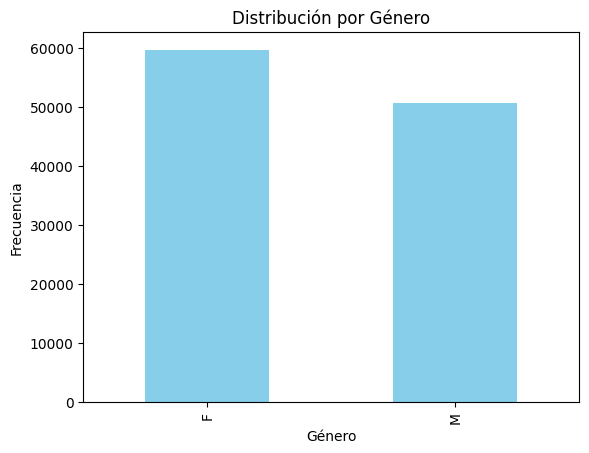

In [14]:
df['ESTU_GENERO'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución por Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

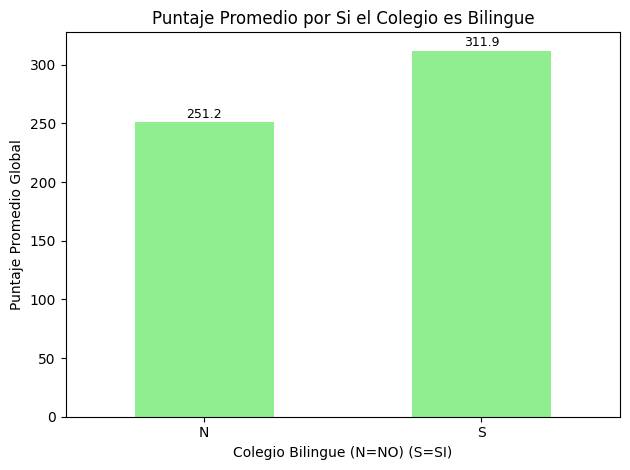

In [15]:
df.groupby('COLE_BILINGUE')['PUNT_GLOBAL'].mean().plot(kind='bar', color='lightgreen')
plt.title('Puntaje Promedio por Si el Colegio es Bilingue')

promedios_por_si_el_coleguio_es_bilingue = df.groupby('COLE_BILINGUE')['PUNT_GLOBAL'].mean()

for i, value in enumerate(promedios_por_si_el_coleguio_es_bilingue.values):
    plt.text(i, value + 1, f'{value:.1f}', ha='center', va='bottom', fontsize=9)

plt.xlabel('Colegio Bilingue (N=NO) (S=SI)')
plt.ylabel('Puntaje Promedio Global')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

<Axes: xlabel='COLE_BILINGUE', ylabel='PUNT_GLOBAL'>

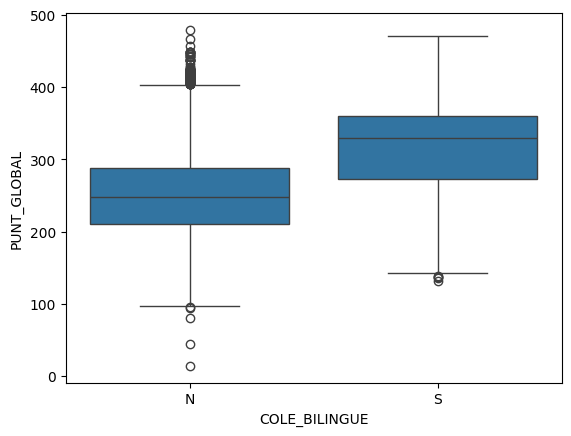

In [16]:
sns.boxplot(x="COLE_BILINGUE", y='PUNT_GLOBAL', data=df)

<Axes: xlabel='ESTU_GENERO', ylabel='PUNT_GLOBAL'>

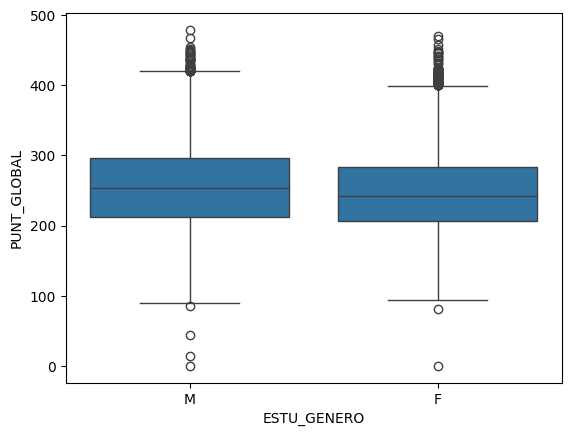

In [17]:
sns.boxplot(x='ESTU_GENERO', y='PUNT_GLOBAL', data=df)

<Axes: >

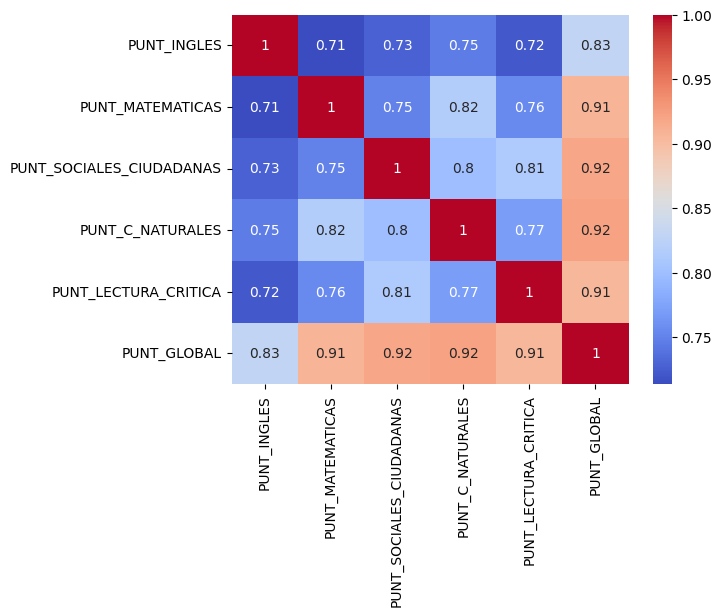

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

puntajes = df[['PUNT_INGLES', 'PUNT_MATEMATICAS', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES', 'PUNT_LECTURA_CRITICA', 'PUNT_GLOBAL']]
corr = puntajes.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [19]:
print("Columnas disponibles:", df.columns.tolist())

Columnas disponibles: ['PERIODO', 'ESTU_CONSECUTIVO', 'COLE_AREA_UBICACION', 'COLE_BILINGUE', 'COLE_CALENDARIO', 'COLE_DEPTO_UBICACION', 'COLE_GENERO', 'COLE_JORNADA', 'COLE_NATURALEZA', 'ESTU_COD_DEPTO_PRESENTACION', 'ESTU_DEPTO_PRESENTACION', 'ESTU_GENERO', 'FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET', 'PUNT_INGLES', 'PUNT_MATEMATICAS', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES', 'PUNT_LECTURA_CRITICA', 'PUNT_GLOBAL']


In [70]:
df_filtrado = df[(df['PUNT_GLOBAL'] >= 110) & (df['PUNT_GLOBAL'] <= 420)].copy()
df_filtrado['Puntaje_Alto'] = (df_filtrado['PUNT_GLOBAL'] >= 280).astype(int)
cols_objeto = [
    'COLE_AREA_UBICACION',
    'COLE_BILINGUE',
    'COLE_CALENDARIO',
    'COLE_DEPTO_UBICACION',
    'COLE_GENERO',
    'COLE_JORNADA',
    'COLE_NATURALEZA',
    'ESTU_DEPTO_PRESENTACION',
    'ESTU_GENERO',
    'FAMI_EDUCACIONMADRE',
    'FAMI_EDUCACIONPADRE',
    'FAMI_ESTRATOVIVIENDA',
    'FAMI_TIENEAUTOMOVIL',
    'FAMI_TIENECOMPUTADOR',
    'FAMI_TIENEINTERNET'
]
# Apply get_dummies to df_filtrado which contains 'Puntaje_Alto'
df_encoded = pd.get_dummies(df_filtrado[cols_objeto + ['Puntaje_Alto']], drop_first=True)
correlaciones = df_encoded.corr()['Puntaje_Alto'].sort_values(ascending=False)
print(correlaciones)

Puntaje_Alto                               1.000000
COLE_CALENDARIO_B                          0.277577
FAMI_TIENEINTERNET_Si                      0.275818
FAMI_TIENECOMPUTADOR_Si                    0.273559
FAMI_TIENEAUTOMOVIL_Si                     0.258469
                                             ...   
COLE_JORNADA_SABATINA                     -0.154501
FAMI_EDUCACIONPADRE_Primaria incompleta   -0.154505
FAMI_EDUCACIONMADRE_Primaria incompleta   -0.156713
COLE_GENERO_MIXTO                         -0.159646
COLE_NATURALEZA_OFICIAL                   -0.268021
Name: Puntaje_Alto, Length: 110, dtype: float64


/tmp/ipykernel_2023/2787841501.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette="coolwarm")


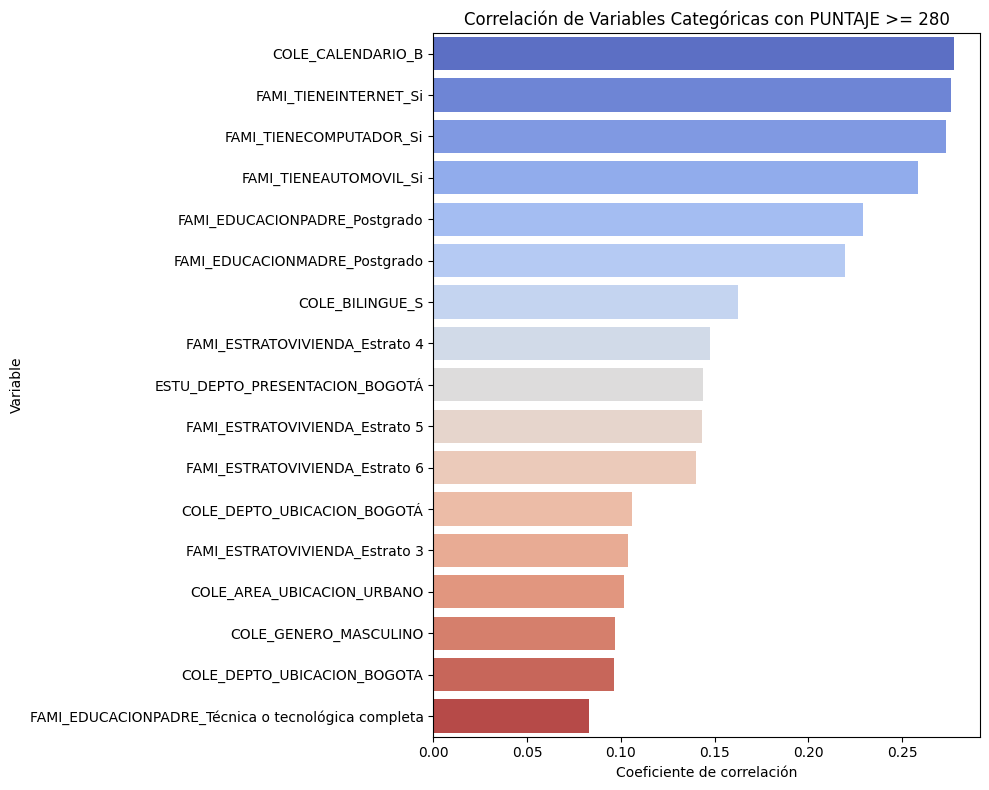

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tomar solo las top correlaciones relevantes
top_corr = correlaciones[1:18]  # excluye la correlación perfecta consigo misma (1.0)

plt.figure(figsize=(10, 8))
sns.barplot(x=top_corr.values, y=top_corr.index, palette="coolwarm")
plt.title("Correlación de Variables Categóricas con PUNTAJE >= 280")
plt.xlabel("Coeficiente de correlación")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

In [72]:
df_filtrado.describe(include='all')

,PERIODO,ESTU_CONSECUTIVO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_DEPTO_UBICACION,COLE_GENERO,COLE_JORNADA,COLE_NATURALEZA,ESTU_COD_DEPTO_PRESENTACION,...,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL,Puntaje_Alto
count,110224.00000,110224,110224,92544,110224,110224,110224,110224,110224,110224.000000,...,106215,106412,103486,110190.000000,110224.000000,110224.000000,110224.000000,110224.000000,110224.000000,110224.000000
unique,NaN,110224,2,2,3,34,3,6,2,NaN,...,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,SB11201810028234,URBANO,N,A,BOGOTÁ,MIXTO,MAÑANA,OFICIAL,NaN,...,No,Si,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,92842,89209,100286,16029,105862,49804,75840,NaN,...,75965,62677,66609,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,20195.35916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.830101,...,NaN,NaN,NaN,50.140494,51.451898,47.309951,49.174545,52.982944,251.113932,0.302103
std,6.95591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.213944,...,NaN,NaN,NaN,14.098168,12.468272,12.667213,11.233737,10.869095,54.272274,0.459172
min,20181.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,...,NaN,NaN,NaN,0.000000,15.000000,0.000000,0.000000,0.000000,110.000000,0.000000
25%,20194.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,...,NaN,NaN,NaN,40.000000,43.000000,37.000000,41.000000,45.000000,210.000000,0.000000
50%,20194.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,...,NaN,NaN,NaN,49.000000,51.000000,46.000000,48.000000,53.000000,247.000000,0.000000
75%,20194.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.000000,...,NaN,NaN,NaN,58.000000,60.000000,57.000000,57.000000,61.000000,289.000000,1.000000


In [73]:
df_filtrado['Puntaje_Alto'] = (df_filtrado['PUNT_GLOBAL'] >= 280).astype(int)

df_filtrado.head()

,PERIODO,ESTU_CONSECUTIVO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_DEPTO_UBICACION,COLE_GENERO,COLE_JORNADA,COLE_NATURALEZA,ESTU_COD_DEPTO_PRESENTACION,...,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL,Puntaje_Alto
0,20181,SB11201810028234,URBANO,N,B,VALLE,MIXTO,MAÑANA,NO OFICIAL,76,...,No,Si,Si,52.0,34,32,41,44,194,0
1,20181,SB11201810047396,URBANO,N,A,TOLIMA,MIXTO,SABATINA,NO OFICIAL,73,...,Si,Si,Si,47.0,47,46,52,58,252,0
2,20181,SB11201810016997,URBANO,S,B,BOGOTA,MIXTO,COMPLETA,NO OFICIAL,11,...,Si,Si,Si,87.0,79,74,77,71,381,1
3,20181,SB11201810000913,URBANO,N,B,NARIÑO,MIXTO,COMPLETA,NO OFICIAL,52,...,Si,Si,Si,81.0,81,66,75,73,372,1
4,20181,SB11201810011839,URBANO,N,OTRO,CUNDINAMARCA,MIXTO,NOCHE,NO OFICIAL,25,...,No,No,No,45.0,36,32,39,46,194,0


In [74]:
df_filtrado['FAMI_ESTRATOVIVIENDA'] = (
    df_filtrado['FAMI_ESTRATOVIVIENDA']
    .fillna('0')
    .astype(str)
    .str.extract(r'(\d+)')  # ← Notá la 'r' antes del string
    .astype(float)
)

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df_before = df_filtrado[['FAMI_ESTRATOVIVIENDA', 'ESTU_COD_DEPTO_PRESENTACION']].dropna()
Xb = df_before
yb = df_filtrado.loc[df_before.index, 'Puntaje_Alto']

Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.3, random_state=42)

model_before = LogisticRegression(max_iter=200)
model_before.fit(Xb_train, yb_train)
yb_pred = model_before.predict(Xb_test)
acc_before = accuracy_score(yb_test, yb_pred)

print("Exactitud antes de la limpieza:", round(acc_before, 4))

Exactitud antes de la limpieza: 0.7197


Text(0.5, 0, 'Puntaje Global')

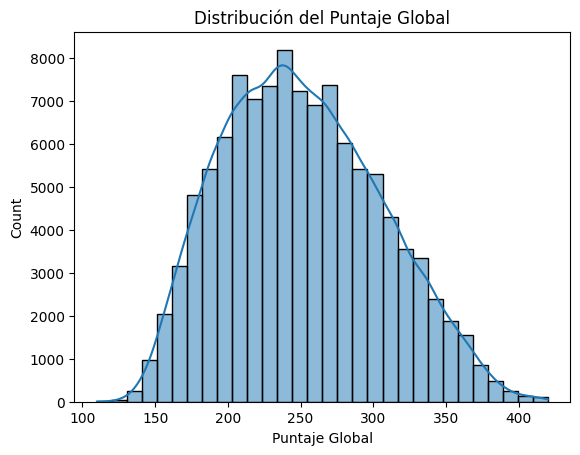

In [76]:
sns.histplot(df_filtrado['PUNT_GLOBAL'], kde=True, bins=30)
plt.title('Distribución del Puntaje Global')
plt.xlabel('Puntaje Global')

In [62]:
print("Columnas disponibles:", df.columns.tolist())

Columnas disponibles: ['PERIODO', 'ESTU_CONSECUTIVO', 'COLE_AREA_UBICACION', 'COLE_BILINGUE', 'COLE_CALENDARIO', 'COLE_DEPTO_UBICACION', 'COLE_GENERO', 'COLE_JORNADA', 'COLE_NATURALEZA', 'ESTU_COD_DEPTO_PRESENTACION', 'ESTU_DEPTO_PRESENTACION', 'ESTU_GENERO', 'FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET', 'PUNT_INGLES', 'PUNT_MATEMATICAS', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES', 'PUNT_LECTURA_CRITICA', 'PUNT_GLOBAL']


In [63]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

df_clean = df_filtrado.copy()

# Imputación
imputer_Estrato = SimpleImputer(strategy='median')
df_clean['FAMI_ESTRATOVIVIENDA'] = imputer_Estrato.fit_transform(df_clean[['FAMI_ESTRATOVIVIENDA']])

imputer_DeptoCod = SimpleImputer(strategy='median')
df_clean['ESTU_COD_DEPTO_PRESENTACION'] = imputer_DeptoCod.fit_transform(df_clean[['ESTU_COD_DEPTO_PRESENTACION']])

imputer_Area = SimpleImputer(strategy='most_frequent')
df_clean['COLE_AREA_UBICACION'] = imputer_Area.fit_transform(df_clean[['COLE_AREA_UBICACION']]).ravel()

imputer_Bilingue = SimpleImputer(strategy='most_frequent')
df_clean['COLE_BILINGUE'] = imputer_Bilingue.fit_transform(df_clean[['COLE_BILINGUE']]).ravel()

imputer_CALENDARIO = SimpleImputer(strategy='most_frequent')
df_clean['COLE_CALENDARIO'] = imputer_CALENDARIO.fit_transform(df_clean[['COLE_CALENDARIO']]).ravel()

imputer_GENERO = SimpleImputer(strategy='most_frequent')
df_clean['COLE_GENERO'] = imputer_GENERO.fit_transform(df_clean[['COLE_GENERO']]).ravel()

imputer_JORNADA = SimpleImputer(strategy='most_frequent')
df_clean[ 'COLE_JORNADA' ] = imputer_JORNADA.fit_transform(df_clean[[ 'COLE_JORNADA' ]]).ravel()

imputer_NATURALEZA = SimpleImputer(strategy='most_frequent')
df_clean[ 'COLE_NATURALEZA' ] = imputer_NATURALEZA.fit_transform(df_clean[[ 'COLE_NATURALEZA' ]]).ravel()

imputer_EDUCACIONMADRE = SimpleImputer(strategy='most_frequent')
df_clean[ 'FAMI_EDUCACIONMADRE' ] = imputer_EDUCACIONMADRE.fit_transform(df_clean[[ 'FAMI_EDUCACIONMADRE' ]]).ravel()

imputer_EDUCACIONPADRE = SimpleImputer(strategy='most_frequent')
df_clean[ 'FAMI_EDUCACIONPADRE'] = imputer_EDUCACIONPADRE.fit_transform(df_clean[[ 'FAMI_EDUCACIONPADRE']]).ravel()

imputer_TIENEAUTOMOVIL = SimpleImputer(strategy='most_frequent')
df_clean[ 'FAMI_TIENEAUTOMOVIL' ] = imputer_TIENEAUTOMOVIL.fit_transform(df_clean[[ 'FAMI_TIENEAUTOMOVIL' ]]).ravel()

imputer_TIENECOMPUTADOR = SimpleImputer(strategy='most_frequent')
df_clean[ 'FAMI_TIENECOMPUTADOR' ] = imputer_TIENECOMPUTADOR.fit_transform(df_clean[[ 'FAMI_TIENECOMPUTADOR' ]]).ravel()

imputer_TIENEINTERNET = SimpleImputer(strategy='most_frequent')
df_clean[ 'FAMI_TIENEINTERNET'] = imputer_TIENEINTERNET.fit_transform(df_clean[[ 'FAMI_TIENEINTERNET']]).ravel()

# Codificación de variables categóricas
df_clean = pd.get_dummies(df_clean, columns=['COLE_AREA_UBICACION', 'COLE_BILINGUE', 'COLE_CALENDARIO','COLE_GENERO', 'COLE_JORNADA' , 'COLE_NATURALEZA' , 'FAMI_EDUCACIONMADRE' , 'FAMI_EDUCACIONPADRE', 'FAMI_TIENEAUTOMOVIL' , 'FAMI_TIENECOMPUTADOR' , 'FAMI_TIENEINTERNET'], drop_first=True)

# Escalado
scaler = MinMaxScaler()
df_clean[['FAMI_ESTRATOVIVIENDA', 'ESTU_COD_DEPTO_PRESENTACION']] = scaler.fit_transform(df_clean[['FAMI_ESTRATOVIVIENDA', 'ESTU_COD_DEPTO_PRESENTACION']])

In [64]:
print("Columnas en df_clean:", df_clean.columns.tolist())
df_clean.head()

Columnas en df_clean: ['PERIODO', 'ESTU_CONSECUTIVO', 'COLE_DEPTO_UBICACION', 'ESTU_COD_DEPTO_PRESENTACION', 'ESTU_DEPTO_PRESENTACION', 'ESTU_GENERO', 'FAMI_ESTRATOVIVIENDA', 'PUNT_INGLES', 'PUNT_MATEMATICAS', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES', 'PUNT_LECTURA_CRITICA', 'PUNT_GLOBAL', 'Puntaje_Alto', 'COLE_AREA_UBICACION_URBANO', 'COLE_BILINGUE_S', 'COLE_CALENDARIO_B', 'COLE_CALENDARIO_OTRO', 'COLE_GENERO_MASCULINO', 'COLE_GENERO_MIXTO', 'COLE_JORNADA_MAÑANA', 'COLE_JORNADA_NOCHE', 'COLE_JORNADA_SABATINA', 'COLE_JORNADA_TARDE', 'COLE_JORNADA_UNICA', 'COLE_NATURALEZA_OFICIAL', 'FAMI_EDUCACIONMADRE_Educación profesional incompleta', 'FAMI_EDUCACIONMADRE_Ninguno', 'FAMI_EDUCACIONMADRE_No Aplica', 'FAMI_EDUCACIONMADRE_No sabe', 'FAMI_EDUCACIONMADRE_Postgrado', 'FAMI_EDUCACIONMADRE_Primaria completa', 'FAMI_EDUCACIONMADRE_Primaria incompleta', 'FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa', 'FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta', 'FAMI_EDUCACIONMADRE

,PERIODO,ESTU_CONSECUTIVO,COLE_DEPTO_UBICACION,ESTU_COD_DEPTO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_GENERO,FAMI_ESTRATOVIVIENDA,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,...,FAMI_EDUCACIONPADRE_Postgrado,FAMI_EDUCACIONPADRE_Primaria completa,FAMI_EDUCACIONPADRE_Primaria incompleta,FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONPADRE_Técnica o tecnológica completa,FAMI_EDUCACIONPADRE_Técnica o tecnológica incompleta,FAMI_TIENEAUTOMOVIL_Si,FAMI_TIENECOMPUTADOR_Si,FAMI_TIENEINTERNET_Si
0,20181,SB11201810028234,VALLE,0.755319,VALLE,M,0.833333,52.0,34,32,...,False,False,False,False,False,True,False,False,True,True
1,20181,SB11201810047396,TOLIMA,0.723404,TOLIMA,F,1.000000,47.0,47,46,...,False,True,False,False,False,False,False,True,True,True
2,20181,SB11201810016997,BOGOTA,0.063830,BOGOTÁ,M,1.000000,87.0,79,74,...,False,False,False,False,False,False,False,True,True,True
3,20181,SB11201810000913,NARIÑO,0.500000,NARIÑO,F,0.666667,81.0,81,66,...,False,False,False,False,False,False,False,True,True,True
4,20181,SB11201810011839,CUNDINAMARCA,0.212766,CUNDINAMARCA,F,0.166667,45.0,36,32,...,False,False,False,False,False,False,False,False,False,False


In [65]:
# Eliminar columnas no deseadas
columnas_a_eliminar = [ 'PERIODO', 'ESTU_CONSECUTIVO', 'COLE_DEPTO_UBICACION',
    'ESTU_DEPTO_PRESENTACION', 'PUNT_INGLES', 'PUNT_MATEMATICAS' , 'PUNT_SOCIALES_CIUDADANAS' ,
    'PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES', 'PUNT_LECTURA_CRITICA', 'PUNT_GLOBAL', 'Puntaje_Alto'
]

Xc = df_clean.drop(columns=columnas_a_eliminar)

# 1. Codificar variables categóricas
columnas_categoricas = Xc.select_dtypes(include=['object']).columns.tolist()
if columnas_categoricas:
    Xc = pd.get_dummies(Xc, columns=columnas_categoricas, drop_first=True)

# 2. Imputar valores faltantes (usando la media)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
Xc_imputed = imputer.fit_transform(Xc)
Xc = pd.DataFrame(Xc_imputed, columns=Xc.columns, index=Xc.index)

# 3. Verificar que no hay NaN
print("Valores NaN restantes:", Xc.isnull().sum().sum())  # Debe ser 0

# 4. Separar y entrenar
yc = df_clean['Puntaje_Alto']
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.3, random_state=42)

model_after = LogisticRegression(max_iter=1000)
model_after.fit(Xc_train, yc_train)

yc_pred = model_after.predict(Xc_test)
acc_after = accuracy_score(yc_test, yc_pred)

print("✅ Exactitud después de la limpieza:", round(acc_after, 4))

Valores NaN restantes: 0
✅ Exactitud después de la limpieza: 0.7719


Text(0.5, 0, 'Puntaje Global')

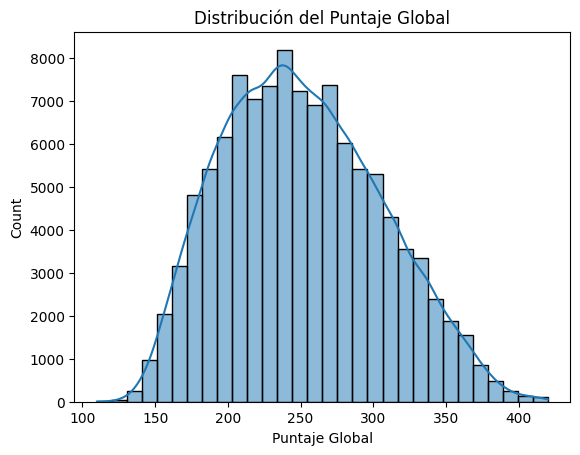

In [66]:
sns.histplot(df_clean['PUNT_GLOBAL'], kde=True, bins=30)
plt.title('Distribución del Puntaje Global')
plt.xlabel('Puntaje Global')

In [67]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(Xc_train)
X_test = scaler.transform(Xc_test)

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, yc_train)
y_pred = knn.predict(X_test)

In [69]:
print("Exactitud:", round(accuracy_score(yc_test, y_pred), 4))
print(classification_report(yc_test, y_pred))

Exactitud: 0.7371
              precision    recall  f1-score   support

           0       0.79      0.85      0.82     23058
           1       0.58      0.48      0.52     10010

    accuracy                           0.74     33068
   macro avg       0.68      0.66      0.67     33068
weighted avg       0.73      0.74      0.73     33068



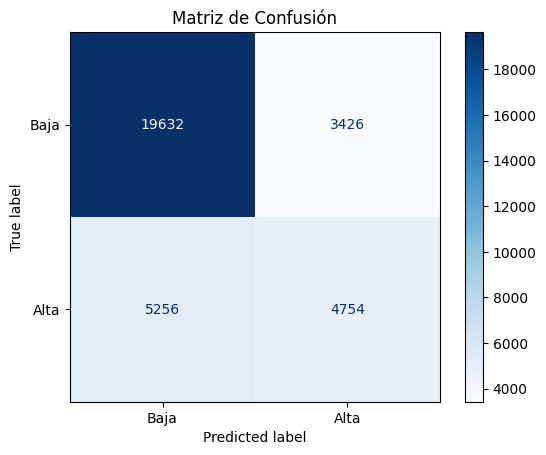

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(yc_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Baja", "Alta"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusión")
plt.show()

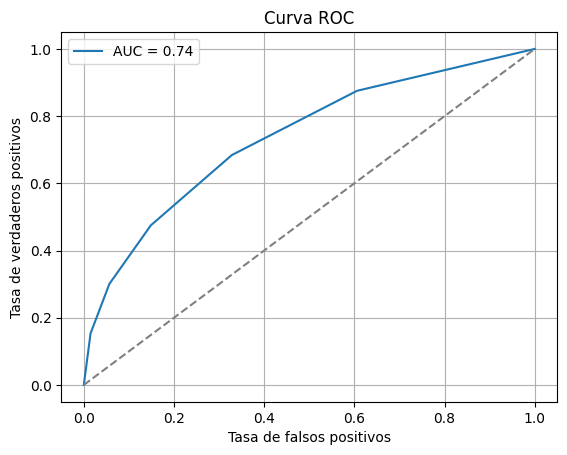

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = knn.predict_proba(X_test)[:, 1]  # Probabilidad de clase positiva
fpr, tpr, _ = roc_curve(yc_test, y_prob)
auc = roc_auc_score(yc_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC")
plt.legend()
plt.grid(True)
plt.show()

In [36]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [37]:
model_corr = LogisticRegression(max_iter=200, class_weight='balanced')
model_corr.fit(X_train, yc_train)
y_pred_corr = model_corr.predict(X_test)
y_prob_corr = model_corr.predict_proba(X_test)[:, 1]

Reporte de clasificación (modelo corregido):
              precision    recall  f1-score   support

           0       0.85      0.74      0.79     23058
           1       0.53      0.70      0.61     10010

    accuracy                           0.72     33068
   macro avg       0.69      0.72      0.70     33068
weighted avg       0.75      0.72      0.73     33068



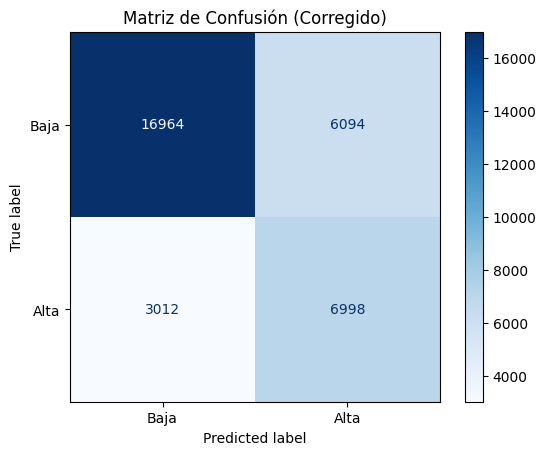

In [38]:
print("Reporte de clasificación (modelo corregido):")
print(classification_report(yc_test, y_pred_corr, zero_division=0))

cm = confusion_matrix(yc_test, y_pred_corr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Baja", "Alta"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusión (Corregido)")
plt.show()

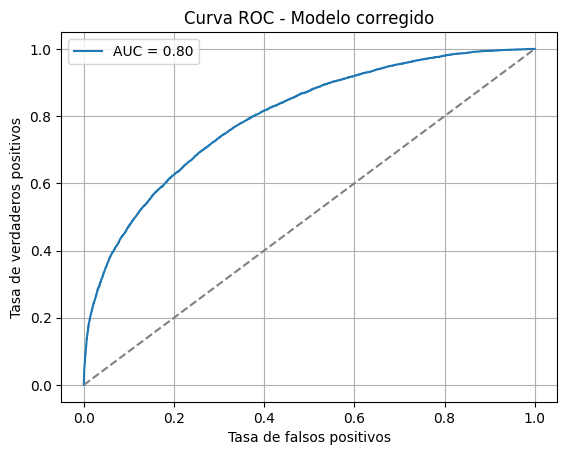

In [39]:
fpr, tpr, _ = roc_curve(yc_test, y_prob_corr)
auc = roc_auc_score(yc_test, y_prob_corr)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC - Modelo corregido")
plt.legend()
plt.grid(True)
plt.show()

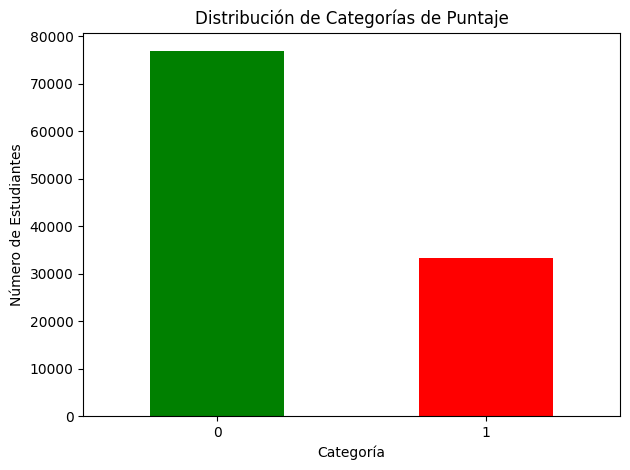

In [40]:
df_clean['Puntaje_Alto'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribución de Categorías de Puntaje')
plt.xlabel('Categoría')
plt.ylabel('Número de Estudiantes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [78]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

In [80]:
Xa = df_clean [variables]
ya = df_clean ['Puntaje_Alto']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [81]:
tree_full = DecisionTreeClassifier(random_state=42)
tree_full.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

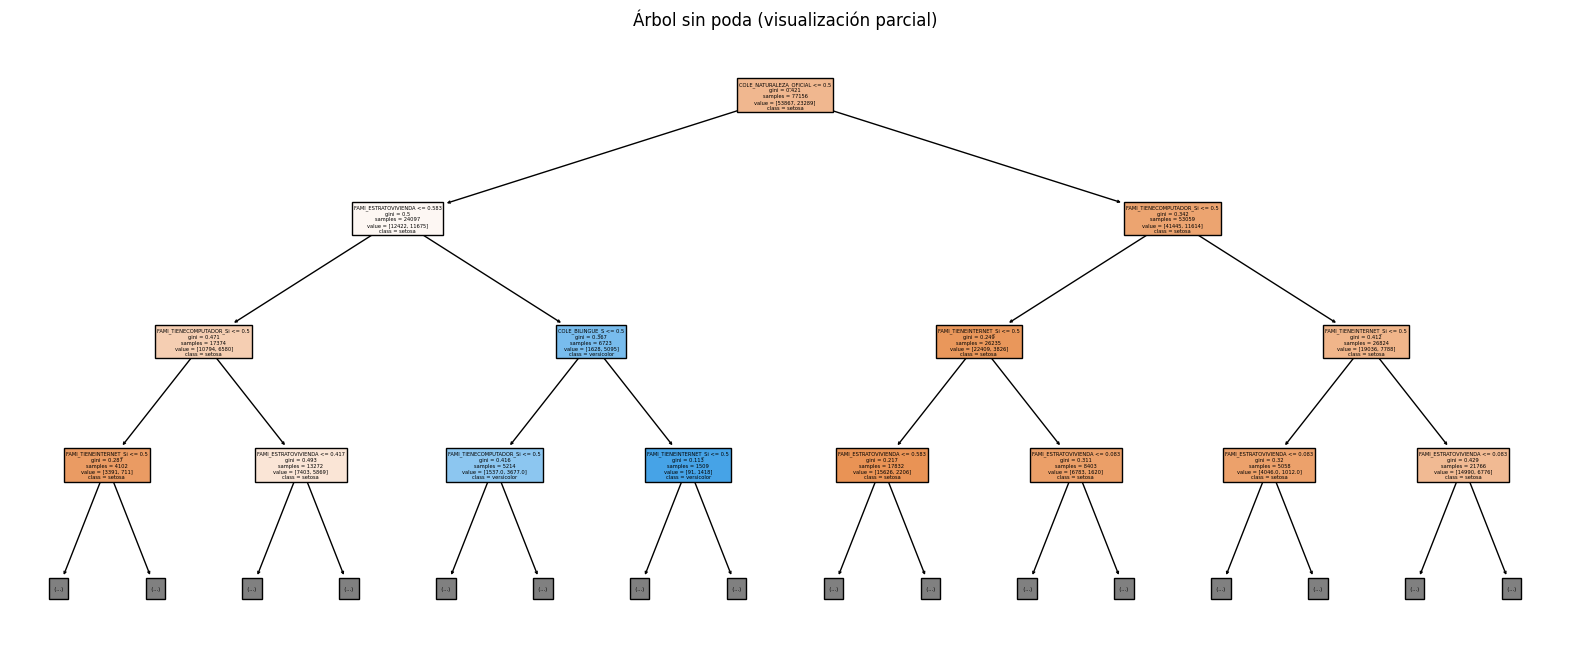

In [82]:
from sklearn.datasets import load_iris

data = load_iris()
df_clean = pd.DataFrame(data.data, columns=data.feature_names)
ya = data.target  # Esto es un array de enteros (0, 1, 2)

# Nombres de las clases
class_names = data.target_names  # ["setosa", "versicolor", "virginica"]

# Graficar el árbol
plt.figure(figsize=(20,8))
plot_tree(
    tree_full, 
    feature_names=Xa.columns, 
    class_names=class_names,  # Usar los nombres reales, no los números
    filled=True, 
    max_depth=3
)
plt.title("Árbol sin poda (visualización parcial)")
plt.show()

In [ ]:
plt.figure(figsize=(24,12))
plot_tree(tree_full, feature_names=Xa.columns, class_names=data.target_names, filled=True)
plt.title("Árbol sin poda (completo)")
plt.show()

In [48]:
y_pred_full = tree_full.predict(X_test)
print("Reporte de clasificación - Árbol sin poda")
print(classification_report(y_test, y_pred_full))

Reporte de clasificación - Árbol sin poda
              precision    recall  f1-score   support

           0       0.77      0.92      0.84     23058
           1       0.66      0.38      0.48     10010

    accuracy                           0.75     33068
   macro avg       0.72      0.65      0.66     33068
weighted avg       0.74      0.75      0.73     33068



In [49]:
tree_pruned = DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=42)
tree_pruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=42)

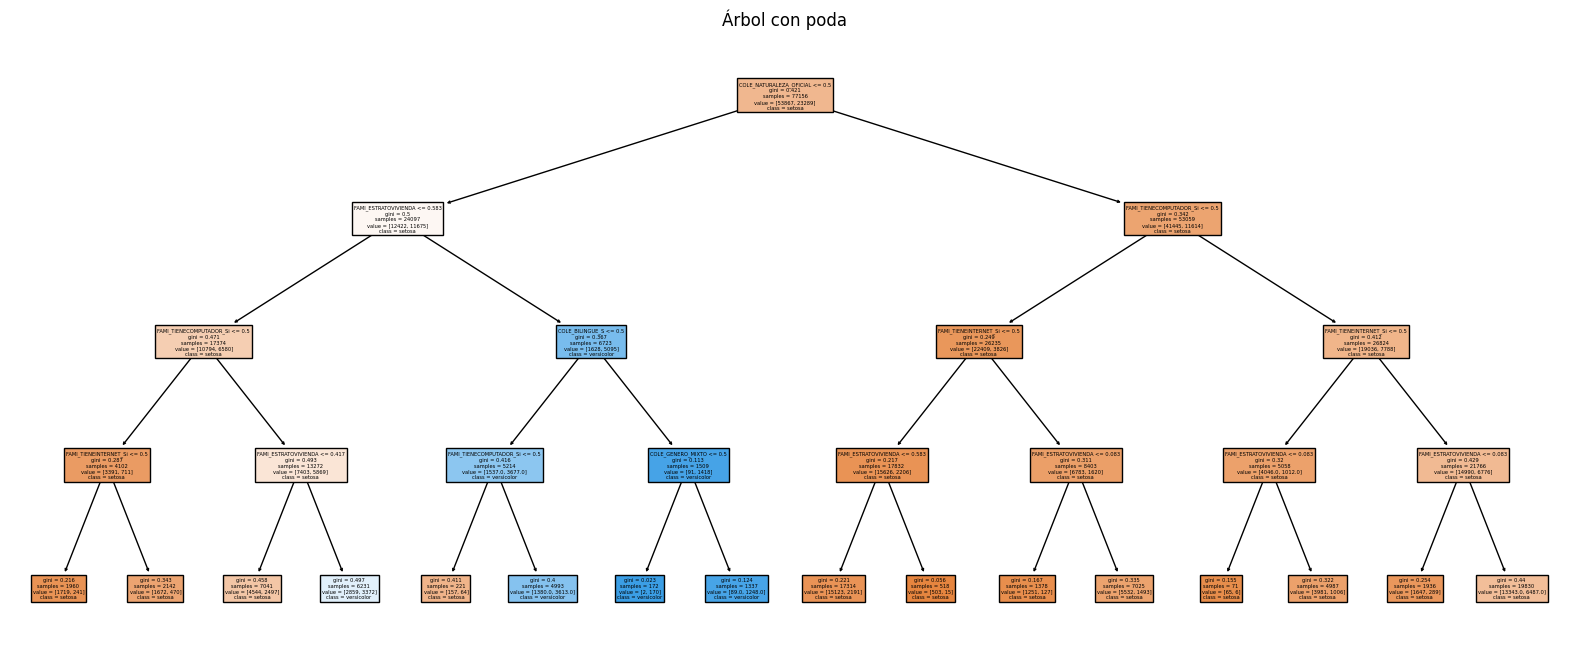

In [50]:
plt.figure(figsize=(20,8))
plot_tree(tree_pruned, feature_names=X.columns, class_names=data.target_names, filled=True)
plt.title("Árbol con poda")
plt.show()

In [51]:
y_pred_pruned = tree_pruned.predict(X_test)
print("Reporte de clasificación - Árbol podado")
print(classification_report(y_test, y_pred_pruned))

Reporte de clasificación - Árbol podado
              precision    recall  f1-score   support

           0       0.77      0.92      0.84     23058
           1       0.65      0.36      0.46     10010

    accuracy                           0.75     33068
   macro avg       0.71      0.64      0.65     33068
weighted avg       0.73      0.75      0.72     33068



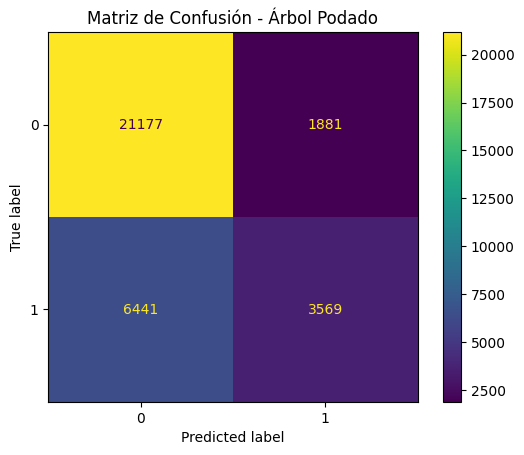

In [52]:
ConfusionMatrixDisplay.from_estimator(tree_pruned, X_test, y_test)
plt.title("Matriz de Confusión - Árbol Podado")
plt.show()

In [53]:
y_scores = tree_pruned.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

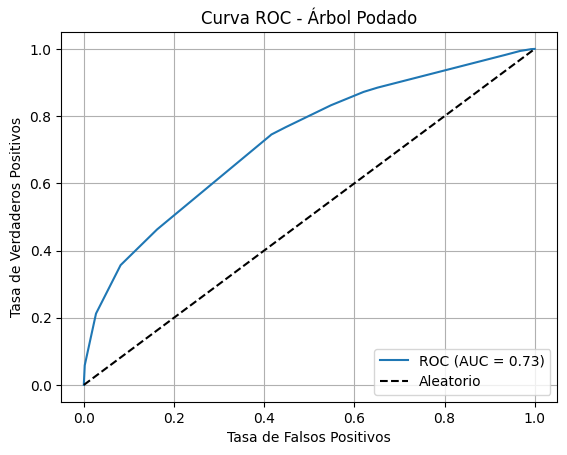

In [54]:
plt.figure()
plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Aleatorio")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC - Árbol Podado")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [55]:
df_Cln = df_filtrado.copy()

# Imputación
imputer_Estrato = SimpleImputer(strategy='median')
df_Cln['FAMI_ESTRATOVIVIENDA'] = imputer_Estrato.fit_transform(df_Cln[['FAMI_ESTRATOVIVIENDA']])

imputer_DeptoCod = SimpleImputer(strategy='median')
df_Cln['ESTU_COD_DEPTO_PRESENTACION'] = imputer_DeptoCod.fit_transform(df_Cln[['ESTU_COD_DEPTO_PRESENTACION']])

imputer_Area = SimpleImputer(strategy='most_frequent')
df_Cln['COLE_AREA_UBICACION'] = imputer_Area.fit_transform(df_Cln[['COLE_AREA_UBICACION']]).ravel()

imputer_Bilingue = SimpleImputer(strategy='most_frequent')
df_Cln['COLE_BILINGUE'] = imputer_Bilingue.fit_transform(df_Cln[['COLE_BILINGUE']]).ravel()

imputer_CALENDARIO = SimpleImputer(strategy='most_frequent')
df_Cln['COLE_CALENDARIO'] = imputer_CALENDARIO.fit_transform(df_Cln[['COLE_CALENDARIO']]).ravel()

imputer_GENERO = SimpleImputer(strategy='most_frequent')
df_Cln['COLE_GENERO'] = imputer_GENERO.fit_transform(df_Cln[['COLE_GENERO']]).ravel()

imputer_JORNADA = SimpleImputer(strategy='most_frequent')
df_Cln[ 'COLE_JORNADA' ] = imputer_JORNADA.fit_transform(df_Cln[[ 'COLE_JORNADA' ]]).ravel()

imputer_NATURALEZA = SimpleImputer(strategy='most_frequent')
df_Cln[ 'COLE_NATURALEZA' ] = imputer_NATURALEZA.fit_transform(df_Cln[[ 'COLE_NATURALEZA' ]]).ravel()

imputer_EDUCACIONMADRE = SimpleImputer(strategy='most_frequent')
df_Cln[ 'FAMI_EDUCACIONMADRE' ] = imputer_EDUCACIONMADRE.fit_transform(df_Cln[[ 'FAMI_EDUCACIONMADRE' ]]).ravel()

imputer_EDUCACIONPADRE = SimpleImputer(strategy='most_frequent')
df_Cln[ 'FAMI_EDUCACIONPADRE'] = imputer_EDUCACIONPADRE.fit_transform(df_Cln[[ 'FAMI_EDUCACIONPADRE']]).ravel()

imputer_TIENEAUTOMOVIL = SimpleImputer(strategy='most_frequent')
df_Cln[ 'FAMI_TIENEAUTOMOVIL' ] = imputer_TIENEAUTOMOVIL.fit_transform(df_Cln[[ 'FAMI_TIENEAUTOMOVIL' ]]).ravel()

imputer_TIENECOMPUTADOR = SimpleImputer(strategy='most_frequent')
df_Cln[ 'FAMI_TIENECOMPUTADOR' ] = imputer_TIENECOMPUTADOR.fit_transform(df_Cln[[ 'FAMI_TIENECOMPUTADOR' ]]).ravel()

imputer_TIENEINTERNET = SimpleImputer(strategy='most_frequent')
df_Cln[ 'FAMI_TIENEINTERNET'] = imputer_TIENEINTERNET.fit_transform(df_Cln[[ 'FAMI_TIENEINTERNET']]).ravel()

# Codificación de variables categóricas
df_Cln = pd.get_dummies(df_Cln, columns=['COLE_AREA_UBICACION', 'COLE_BILINGUE', 'COLE_CALENDARIO','COLE_GENERO', 'COLE_JORNADA' , 'COLE_NATURALEZA' , 'FAMI_EDUCACIONMADRE' , 'FAMI_EDUCACIONPADRE', 'FAMI_TIENEAUTOMOVIL' , 'FAMI_TIENECOMPUTADOR' , 'FAMI_TIENEINTERNET'], drop_first=True)

# Escalado
scaler = MinMaxScaler()
df_Cln[['FAMI_ESTRATOVIVIENDA', 'ESTU_COD_DEPTO_PRESENTACION']] = scaler.fit_transform(df_Cln[['FAMI_ESTRATOVIVIENDA', 'ESTU_COD_DEPTO_PRESENTACION']])

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

columnas_a_eliminar = [ 'PERIODO', 'ESTU_CONSECUTIVO', 'COLE_DEPTO_UBICACION',
    'ESTU_DEPTO_PRESENTACION', 'PUNT_INGLES', 'PUNT_MATEMATICAS' , 'PUNT_SOCIALES_CIUDADANAS' ,
    'PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES', 'PUNT_LECTURA_CRITICA', 'PUNT_GLOBAL', 'Puntaje_Alto'
]

Xt = df_Cln.drop(columns=columnas_a_eliminar)
columnas_categoricas = Xt.select_dtypes(include=['object']).columns.tolist()
if columnas_categoricas:
    Xt = pd.get_dummies(Xt, columns=columnas_categoricas, drop_first=True)

# 2. Imputar valores faltantes (usando la media)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
Xt_imputed = imputer.fit_transform(Xc)
Xt = pd.DataFrame(Xt_imputed, columns=Xt.columns, index=Xt.index)

yt = df_Cln ['Puntaje_Alto']

X_train, X_test, y_train, y_test = train_test_split(Xt, yt, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

models = {
    'KNN': KNeighborsClassifier(),
    'Regresión Logística': LogisticRegression(max_iter=300),
    'Árbol de Decisión': DecisionTreeClassifier()
}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name}: Exactitud promedio (cross-val): {scores.mean():.3f} ± {scores.std():.3f}")

KNN: Exactitud promedio (cross-val): 0.743 ± 0.004
Regresión Logística: Exactitud promedio (cross-val): 0.775 ± 0.003
Árbol de Decisión: Exactitud promedio (cross-val): 0.710 ± 0.006
